## 01. PROB data EDA

In [28]:
import collections
import os
import numpy as np
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import fiftyone as fo

In [29]:
# Function to convert annotation information from an XML file into a Python dictionary
# Function from OWDetection class in PROB/datasets/torchvision_datasets/open_world.py
def parse_voc_xml(node):
    voc_dict = {}
    children = list(node)
    if children:
        def_dic = collections.defaultdict(list)
        for dc in map(parse_voc_xml, children):
            for ind, v in dc.items():
                def_dic[ind].append(v)
        if node.tag == 'annotation':
            def_dic['object'] = [def_dic['object']]
        voc_dict = {
            node.tag:
                {ind: v[0] if len(v) == 1 else v
                    for ind, v in def_dic.items()}
        }
    if node.text:
        text = node.text.strip()
        if not children:
            voc_dict[node.tag] = text
    return voc_dict

### 01-01. T1 Dataset EDA

- Check the total number of images in T1

- Analyze annotation (target) information
    - (one image)
        - Check the types and numbers of keys
        - For one image, verify the number and types of objects
        - Visualize bounding box coordinates on the image to confirm annotations are correct
        - Visualize difficult objects (objects with 'difficult' field equal to 1)
        - Check object pose information

In [30]:
# Load the list of image filenames from the T1 dataset
t1_image_list_file = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/owod_t1_train.txt"
with open(t1_image_list_file, "r") as f:
    t1_image_files = [x.strip() for x in f.readlines()]
print(t1_image_files)

print('t1_image_files:', len(t1_image_files))

['000005', '000007', '000009', '000012', '000016', '000017', '000019', '000020', '000021', '000023', '000024', '000026', '000030', '000032', '000033', '000034', '000035', '000036', '000039', '000041', '000042', '000044', '000046', '000047', '000048', '000050', '000051', '000052', '000060', '000061', '000063', '000064', '000065', '000066', '000072', '000073', '000077', '000078', '000081', '000083', '000089', '000091', '000093', '000095', '000099', '000101', '000102', '000104', '000107', '000109', '000110', '000112', '000113', '000117', '000118', '000120', '000121', '000122', '000123', '000125', '000129', '000130', '000131', '000132', '000133', '000134', '000138', '000140', '000141', '000142', '000143', '000146', '000147', '000150', '000153', '000154', '000156', '000158', '000159', '000161', '000162', '000163', '000164', '000165', '000169', '000170', '000171', '000173', '000174', '000177', '000180', '000184', '000187', '000189', '000190', '000192', '000193', '000194', '000198', '000200',

In [31]:
# Set image and annotation paths
t1_images_dir = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/JPEGImages/"
t1_annotation_dir = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/Annotations/"

# Set image and annotation paths for each filename
# Check the information corresponding to the annotations
samples = []
for filename in t1_image_files:
    filepath = os.path.join(t1_images_dir, filename + ".jpg")
    if not os.path.exists(filepath):
        continue
    print('filepath:', filepath)
    
    # Create a FiftyOne sample object
    sample = fo.Sample(filepath=filepath)
    # Load the annotation file
    annot_path = os.path.join(t1_annotation_dir, filename + ".xml")
    if not os.path.exists(annot_path):
        continue
    print('annot_path:', annot_path)
    
    tree = ET.parse(annot_path)
    target = parse_voc_xml(tree.getroot())
    print(target)
    break

filepath: /mnt/sdb1/hjlim/09/PROB/data/OWOD/JPEGImages/000005.jpg
annot_path: /mnt/sdb1/hjlim/09/PROB/data/OWOD/Annotations/000005.xml
{'annotation': {'folder': 'VOC2007', 'filename': '000005.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '325991873'}, 'owner': {'flickrid': 'archintent louisville', 'name': '?'}, 'size': {'width': '500', 'height': '375', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'chair', 'pose': 'Rear', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '263', 'ymin': '211', 'xmax': '324', 'ymax': '339'}}, {'name': 'chair', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '165', 'ymin': '264', 'xmax': '253', 'ymax': '372'}}, {'name': 'chair', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '5', 'ymin': '244', 'xmax': '67', 'ymax': '374'}}, {'name': 'chair', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xm

In [32]:
# Print the number of keys and key names in the target dictionary
num_keys = len(target)
key_names = list(target.keys())

print(f"Number of keys in target: {num_keys}")
print(f"Key names in target: {key_names}")

# Also print the subkeys under the 'annotation' key
if 'annotation' in target:
    num_subkeys = len(target['annotation'])
    subkey_names = list(target['annotation'].keys())
    print(f"Number of subkeys in 'annotation': {num_subkeys}")
    print(f"Subkey names in 'annotation': {subkey_names}")

Number of keys in target: 1
Key names in target: ['annotation']
Number of subkeys in 'annotation': 7
Subkey names in 'annotation': ['folder', 'filename', 'source', 'owner', 'size', 'segmented', 'object']


In [33]:
# Determine the number of objects: check how many objects are in each image
num_objects = len(target['annotation']['object'])
print(f"Number of objects in the image: {num_objects}")

Number of objects in the image: 5


In [34]:
# Check the types of objects
labels = [obj["name"] for obj in target['annotation']['object']]
label_counts = collections.Counter(labels)
print("Label counts:", label_counts)
# This means that only the 'chair' class exists 5 times in this case

Label counts: Counter({'chair': 5})


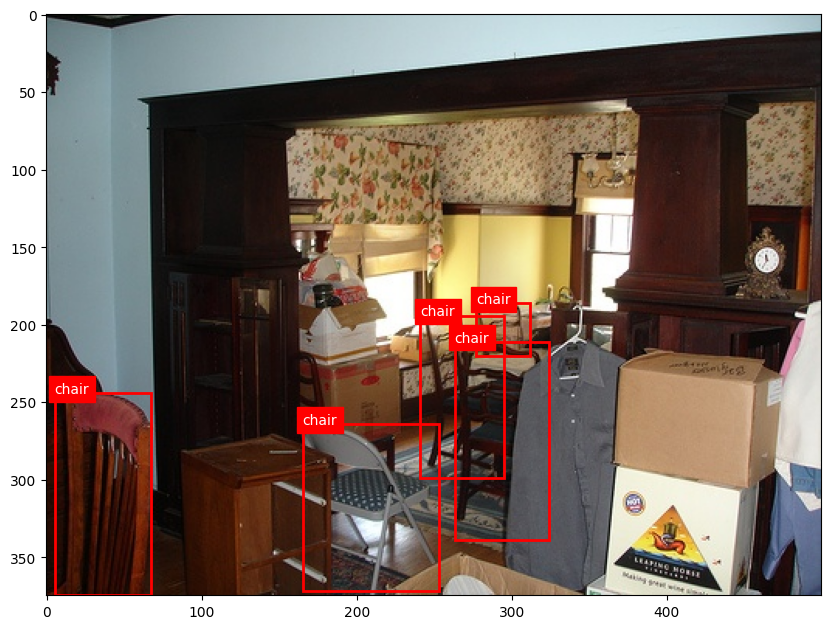

In [35]:
# Visualize bounding boxes: draw bounding box coordinates on the image to visually confirm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

img = Image.open(filepath)
plt.figure(figsize=(10, 10))
plt.imshow(img)

for obj in target['annotation']['object']:
    bbox = obj['bndbox']
    xmin, ymin, xmax, ymax = float(bbox['xmin']), float(bbox['ymin']), float(bbox['xmax']), float(bbox['ymax'])
    width, height = xmax - xmin, ymax - ymin

    # Draw rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin, obj['name'], color='white', backgroundcolor='red')

plt.show()

Difficult objects: [{'name': 'chair', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '5', 'ymin': '244', 'xmax': '67', 'ymax': '374'}}, {'name': 'chair', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '277', 'ymin': '186', 'xmax': '312', 'ymax': '220'}}]


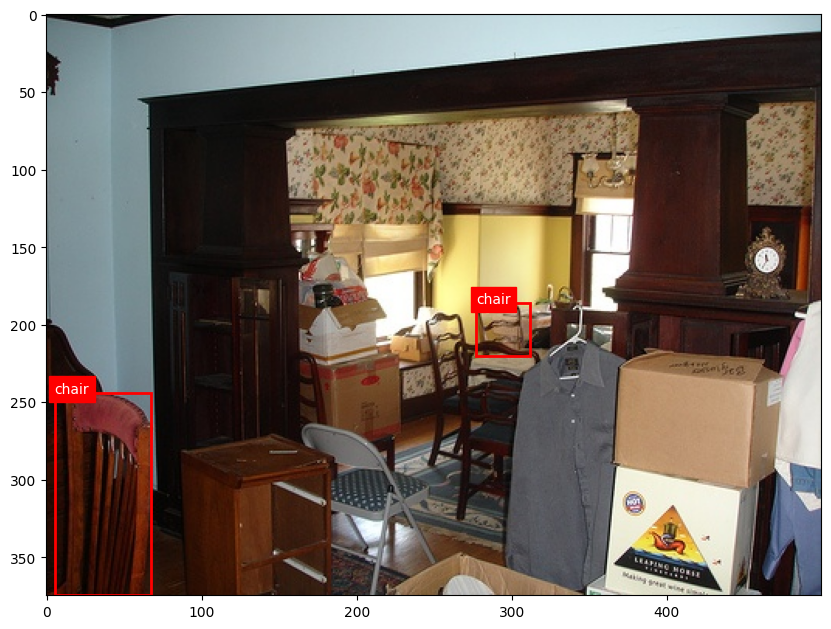

In [39]:
# Identify and visualize difficult objects (objects where the 'difficult' field is 1)
difficult_objects = [obj for obj in target['annotation']['object'] if obj['difficult'] == '1']
print("Difficult objects:", difficult_objects)

# Visualize bounding boxes of difficult objects
img = Image.open(filepath)
plt.figure(figsize=(10, 10))
plt.imshow(img)

for obj in difficult_objects:
    bbox = obj['bndbox']
    xmin, ymin, xmax, ymax = float(bbox['xmin']), float(bbox['ymin']), float(bbox['xmax']), float(bbox['ymax'])
    width, height = xmax - xmin, ymax - ymin

    # Draw rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin, obj['name'], color='white', backgroundcolor='red')

plt.show()

In [40]:
# Check object pose information
poses = [obj['pose'] for obj in target['annotation']['object']]
print("Object poses:", poses)

Object poses: ['Rear', 'Unspecified', 'Unspecified', 'Unspecified', 'Unspecified']


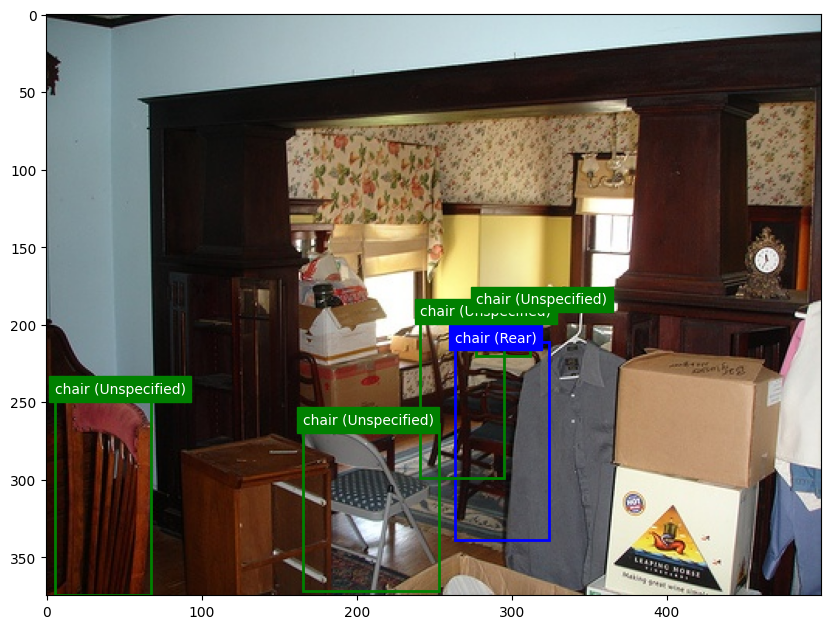

In [41]:
# Visualize to understand what the object poses information is
# 'Rear' seems to mean the object is facing away (back view)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Open the image
img = Image.open(filepath)
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Draw bounding boxes according to pose
for obj in target['annotation']['object']:
    bbox = obj['bndbox']
    xmin, ymin, xmax, ymax = float(bbox['xmin']), float(bbox['ymin']), float(bbox['xmax']), float(bbox['ymax'])
    width, height = xmax - xmin, ymax - ymin

    # Assign colors based on pose
    if obj['pose'] == 'Rear':
        edge_color = 'blue'  # Use blue color for 'Rear' pose
    else:
        edge_color = 'green'  # Use green color for 'Unspecified' pose

    # Draw bounding box
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor=edge_color, facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin, f"{obj['name']} ({obj['pose']})", color='white', backgroundcolor=edge_color)

plt.show()

## 02. PROB data using fiftyone

### 02-01. T1 dataaset

- T1 dataset으로만 Dataset 구축

- label 분포 확인 
    - label 종류 및 개수 확인 
    - label 분포 시각화

- Toy dataset 선별 
    - 선별된 class 기준으로 선택된, 총 이미지 개수 확인 
    - 기준(5)
        - 가장 빈도가 높은 class
        - 가장 빈도가 낮은 class
        - 중간 빈도의 class
        - random하게 선택된 class
        - 교통수단 관련된 class 
    

In [42]:
# Load the list of image filenames from the T1 dataset
t1_image_list_file = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/owod_t1_train.txt"
with open(t1_image_list_file, "r") as f:
    t1_image_files = [x.strip() for x in f.readlines()]

# Set image and annotation paths
t1_images_dir = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/JPEGImages/"
t1_annotation_dir = "/mnt/sdb1/hjlim/09/PROB/data/OWOD/Annotations/"

# Create dataset samples
samples = []
for filename in t1_image_files:
    filepath = os.path.join(t1_images_dir, filename + ".jpg")
    if not os.path.exists(filepath):
        continue

    # Create a FiftyOne sample object
    sample = fo.Sample(filepath=filepath)

    # Load the annotation file
    annot_path = os.path.join(t1_annotation_dir, filename + ".xml")
    if not os.path.exists(annot_path):
        continue

    tree = ET.parse(annot_path)
    target = parse_voc_xml(tree.getroot())

    # Convert annotation information to FiftyOne format
    detections = []
    for obj in target['annotation']['object']:
        label = obj["name"]

        # Convert bounding box coordinates to relative values between 0 and 1
        width = float(target['annotation']['size']['width'])
        height = float(target['annotation']['size']['height'])
        voc2coco = lambda x: [float(v) / width if k in ['xmin', 'xmax'] else float(v) / height for k, v in x.items()]
        bounding_box = voc2coco(obj["bndbox"])
        bounding_box[2] -= bounding_box[0]  # xmax -> width: xmax - xmin
        bounding_box[3] -= bounding_box[1]  # ymax -> height: ymax - ymin

        detections.append(
            fo.Detection(label=label, bounding_box=bounding_box, tags=["difficult"] if obj["difficult"] == '1' else [])
        )

    # Add detection information to the sample
    sample["ground_truth"] = fo.Detections(detections=detections)

    samples.append(sample)

In [44]:
# Create FiftyOne dataset (including only the T1 dataset)
dataset = fo.Dataset("t1-detection-dataset")
dataset.add_samples(samples)

# Open the dataset in the FiftyOne app
session = fo.launch_app(dataset)

 100% |█████████████| 16551/16551 [15.8s elapsed, 0s remaining, 1.1K samples/s]       


In [45]:
# Check label distribution
label_distribution = dataset.count_values("ground_truth.detections.label")
print("Ground Truth Label Distribution:")
print(label_distribution)
print()

# Print the types and counts of keys in label distribution
# Confirm that there are 20 labels in T1
keys = list(label_distribution.keys())
print("Number of keys in label distribution:", len(keys))
print("Key names in label distribution:", keys)

Ground Truth Label Distribution:
{'person': 15576, 'motorbike': 1141, 'cow': 1058, 'cat': 1616, 'chair': 4338, 'bottle': 2116, 'diningtable': 1057, 'sofa': 1211, 'bus': 909, 'train': 984, 'bird': 1820, 'pottedplant': 1724, 'boat': 1397, 'dog': 2079, 'car': 4008, 'horse': 1156, 'bicycle': 1208, 'sheep': 1347, 'aeroplane': 1285, 'tvmonitor': 1193}

Number of keys in label distribution: 20
Key names in label distribution: ['person', 'motorbike', 'cow', 'cat', 'chair', 'bottle', 'diningtable', 'sofa', 'bus', 'train', 'bird', 'pottedplant', 'boat', 'dog', 'car', 'horse', 'bicycle', 'sheep', 'aeroplane', 'tvmonitor']


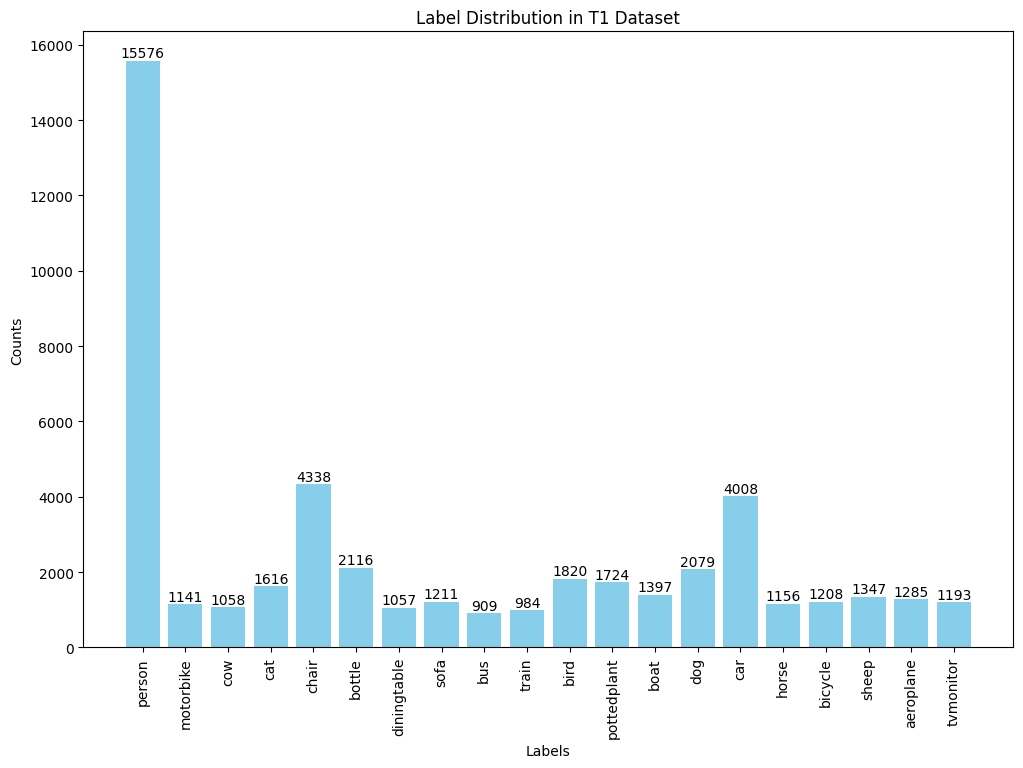

In [46]:
# Visualize label distribution
labels, counts = zip(*label_distribution.items())
plt.figure(figsize=(12, 8))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution in T1 Dataset')
plt.xticks(rotation=90)

# Add numbers to each label
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

In [47]:
import os
import xml.etree.ElementTree as ET
import fiftyone as fo
from fiftyone import ViewField as F
import matplotlib.pyplot as plt
import random

# Define class selection criteria and create datasets accordingly
criteria = {
    "top5_most_common": {
        "description": "Select classes with the highest frequency",
        "classes": [label for label, count in sorted(label_distribution.items(), key=lambda x: x[1], reverse=True)[:5]],
        "output_txt": "owod_t1_train_top5_most_common.txt",
        "dataset_name": "t1_top5_most_common"
    },
    "top5_least_common": {
        "description": "Select classes with the lowest frequency",
        "classes": [label for label, count in sorted(label_distribution.items(), key=lambda x: x[1])[:5]],
        "output_txt": "owod_t1_train_top5_least_common.txt",
        "dataset_name": "t1_top5_least_common"
    },
    "middle5": {
        "description": "Select classes with medium frequency",
        "classes": [label for label, count in sorted(label_distribution.items(), key=lambda x: x[1])[len(label_distribution)//2 - 2: len(label_distribution)//2 + 3]],
        "output_txt": "owod_t1_train_middle5.txt",
        "dataset_name": "t1_middle5_classes"
    },
    "random5": {
        "description": "Select classes randomly",
        "classes": random.sample(list(label_distribution.keys()), 5),
        "output_txt": "owod_t1_train_random5.txt",
        "dataset_name": "t1_random5_classes"
    },
    "transportation": {
        "description": "Select classes related to transportation",
        "classes": ["car", "bicycle", "motorbike", "bus", "train"],
        "output_txt": "owod_t1_train_transportation.txt",
        "dataset_name": "t1_transportation_classes"
    }
}

In [48]:
# Generate datasets and save files based on each criterion
for key, value in criteria.items():
    selected_classes = value["classes"]
    output_txt_file = os.path.join("/mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/", value["output_txt"])
    dataset_name = value["dataset_name"]
    description = value["description"]

    print(f"\nCriterion: {description}")
    print(f"Selected classes: {selected_classes}")
    
    # Filter samples corresponding to selected classes
    view = dataset.filter_labels("ground_truth", F("label").is_in(selected_classes))

    # Extract filenames of filtered images
    selected_image_ids = set()
    for sample in view:
        image_id = os.path.splitext(os.path.basename(sample.filepath))[0]
        selected_image_ids.add(image_id)

    # Print the number of selected images
    print(f"Number of selected images: {len(selected_image_ids)}")

    # Save to a text file
    with open(output_txt_file, "w") as f:
        for image_id in sorted(selected_image_ids):
            f.write(image_id + "\n")

    print(f"Selected image IDs have been saved to {output_txt_file}.")


Criterion: Select classes with the highest frequency
Selected classes: ['person', 'chair', 'car', 'bottle', 'dog']
Number of selected images: 10196
Selected image IDs have been saved to /mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/owod_t1_train_top5_most_common.txt.

Criterion: Select classes with the lowest frequency
Selected classes: ['bus', 'train', 'diningtable', 'cow', 'motorbike']
Number of selected images: 3559
Selected image IDs have been saved to /mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/owod_t1_train_top5_least_common.txt.

Criterion: Select classes with medium frequency
Selected classes: ['sofa', 'aeroplane', 'sheep', 'boat', 'cat']
Number of selected images: 4433
Selected image IDs have been saved to /mnt/sdb1/hjlim/09/PROB/data/OWOD/ImageSets/TOWOD/owod_t1_train_middle5.txt.

Criterion: Select classes randomly
Selected classes: ['sofa', 'car', 'tvmonitor', 'bicycle', 'train']
Number of selected images: 5223
Selected image IDs have been saved to /mnt/sdb1/hjli